In [38]:
def plot_figures(train_graphs, lr):
    cur_epochs = train_graphs.log_epochs
    plt.figure(figsize=(15,5))

    plt.subplot(2,5,2)
    plt.semilogy(cur_epochs, train_graphs.loss)
    #plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Loss')

    plt.subplot(2,5,3)
    plt.plot(cur_epochs, train_graphs.accuracy)
    #.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Accuracy')

    plt.subplot(2,5,4)
    plt.semilogy(cur_epochs, train_graphs.wn_grad_loss_ratio)
    #plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Grad Loss Ratio')

    plt.subplot(2,5,5)
    plt.plot(cur_epochs, train_graphs.wn_norm_min)
    #.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Min Norm')

    plt.tight_layout()
    plt.show()

def plot_figures_widths(widths, model_params):
    plt.figure(figsize=(15,5))
    for width in widths:
        model_param = model_params[width]
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **model_param)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)

        cur_epochs = train_graphs.log_epochs
        print(cur_epochs)
        plt.subplot(2,5,1)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')

        plt.subplot(2,5,2)
        plt.plot(cur_epochs, train_graphs.accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Accuracy')

        plt.subplot(2,5,3)
        print(train_graphs.wn_grad_loss_ratio)
        plt.semilogy(cur_epochs, train_graphs.wn_grad_loss_ratio)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Grad Loss Ratio')

        """
        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.wn_norm_min_with_g)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Min Norm with G')
        """
        plt.subplot(2,5,4)
        plt.plot(cur_epochs, train_graphs.test_accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Accuracy')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.wn_norm_min)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Min Norm')

    plt.legend(widths)
    plt.tight_layout()
    plt.show()



In [1]:
import sys
sys.path.append('..')
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

loss_name = 'MSELoss'

def get_lookup_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, **kwargs):
    results_dir = "results"
    directory = f"{results_dir}/{dataset_name}/{opt_name}/{model_name}/"
    for key, value in kwargs.items():
        directory += f"{key}_{value}/"
    directory += f"lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/"
    return directory

def get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **kwargs):
    #results_dir = "results"
    #directory = f"{results_dir}/{model_name}/{dataset_name}/{opt_name}/lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/epoch_{epochs}/"
    directory = get_lookup_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, **kwargs) + f"epoch_{epochs}/"
    print(directory)
    return directory

In [ ]:
! python main.py --dataset cifar --model weight_norm --loss MSELoss --opt sgd --lr 0.0001 --epoch 4000 --analysis loss weight_norm --batch_size 512 --width 4096 --init_mode "O(1/sqrt{m})" --basis_var 0.02 --wn_scale 1 --momentum 0.9

results/cifar/sgd/weight_norm/width_512/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[1464.48974609375, 12852.859375, 24748.8828125, 19364.45703125, 28719.048828125, 52828.47265625, 53459.4921875, 36327.8671875, 36265.4296875, 72460.421875, 102138.234375, 73317.0703125, 85291.765625, 99670.15625, 47377.015625, 56067.1875, 65132.7109375, 72132.6015625, 70939.734375, 65202.5625]
results/cifar/sgd/weight_norm/width_1024/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[3912.177978515625, 16196.2060546875, 21993.63671875, 57140.8515625, 56930.11328125, 110558.7890625, 87757.7578125, 142804.5625, 218794.5, 100240.90625, 179430.640625, 158833.6875, 131206.296875, 155782.21875, 196145.875, 234167.3125, 175

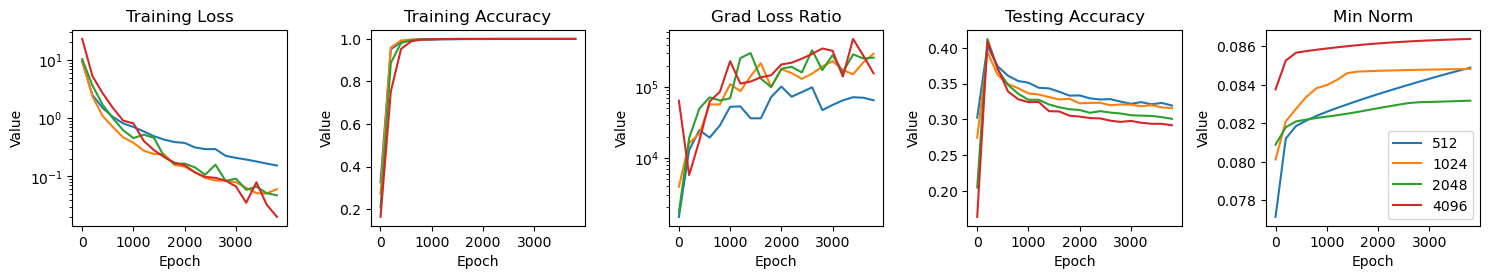

In [51]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.0001, "cifar", "sgd", 0, 512, 4000 
wn_width = 512
model_name = "weight_norm"
model_params = {}
model_params[512] = {"width": 512, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[1024] = {"width": 1024, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[2048] = {"width": 2048, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[4096] = {"width": 4096, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
"""
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
"""
plot_figures_widths([512, 1024, 2048, 4096], model_params)

In [ ]:
! python main.py --dataset cifar --model weight_norm --loss MSELoss --opt sgd --lr 0.01 --epoch 4000 --analysis loss weight_norm --batch_size 512 --width 4096 --init_mode "O(1)" -
-basis_var 5 --wn_scale 10

In [ ]:
! python main.py --dataset cifar --model weight_norm_torch --loss MSELoss --opt sgd --lr 0.01 --epoch 4000 --analysis loss weight_norm --batch_size 512 --width 512

results/cifar/sgd/weight_norm_torch/width_512/lr_0.01/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[24.61222267150879, 164.87554931640625, 602.7796630859375, 700.350830078125, 895.3888549804688, 486.5162658691406, 1084.6285400390625, 1025.7464599609375, 836.203369140625, 1453.425537109375, 1207.873779296875, 606.736083984375, 1104.340576171875, 1749.410400390625, 1576.0799560546875, 1260.8714599609375, 1185.482177734375, 1107.498291015625, 1229.7034912109375, 1674.141357421875]
results/cifar/sgd/weight_norm_torch/width_1024/lr_0.01/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[30.247909545898438, 316.931640625, 523.7084350585938, 300.5067138671875, 353.5718688964844, 1261.9029541015625, 1257.0274658203125, 2179.69482421875, 2112.18408203125, 1858.9320068359375, 2270.66455078125, 833.6176

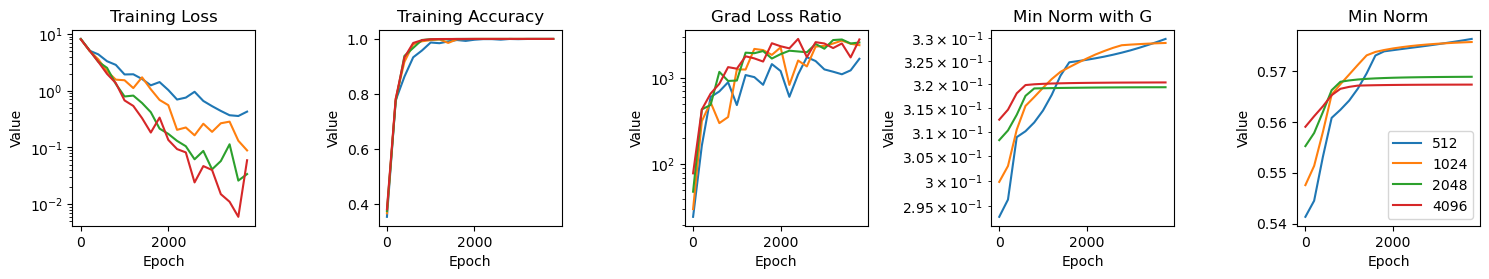

In [25]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 4000 
wn_width = 512
model_name = "weight_norm_torch"
model_params = {}
model_params[512] = {"width": 512}
model_params[1024] = {"width": 1024}
model_params[2048] = {"width": 2048}
model_params[4096] = {"width": 4096}
"""
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
"""
plot_figures_widths([512, 1024, 2048, 4096], model_params)

results/cifar/sgd/weight_norm_torch/width_512/lr_0.01/wd_0/batch_size_512/epoch_40000/
[1, 201, 401, 601, 801, 1001, 1201]
[3.942337989807129, 8.823382377624512, 13.393776893615723, 15.697613716125488, 15.049610137939453, 16.411367416381836, 17.871889114379883]


AttributeError: 'graphs' object has no attribute 'wn_norm_min_with_g'

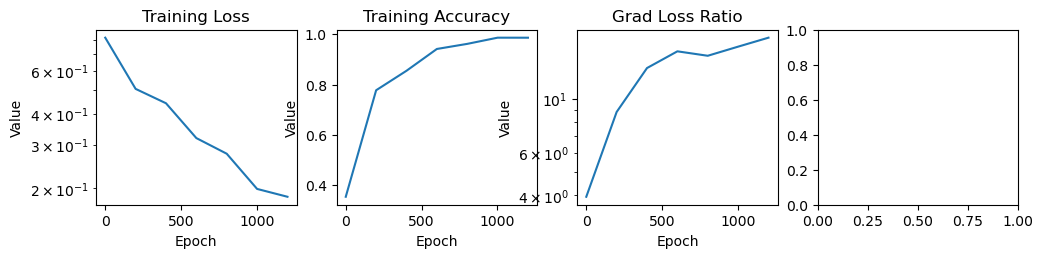

In [19]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 512
model_name = "weight_norm_torch"
model_params = {}
model_params[512] = {"width": 512}
model_params[1024] = {"width": 1024}
"""
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
"""
plot_figures_widths([512, 1024], model_params)

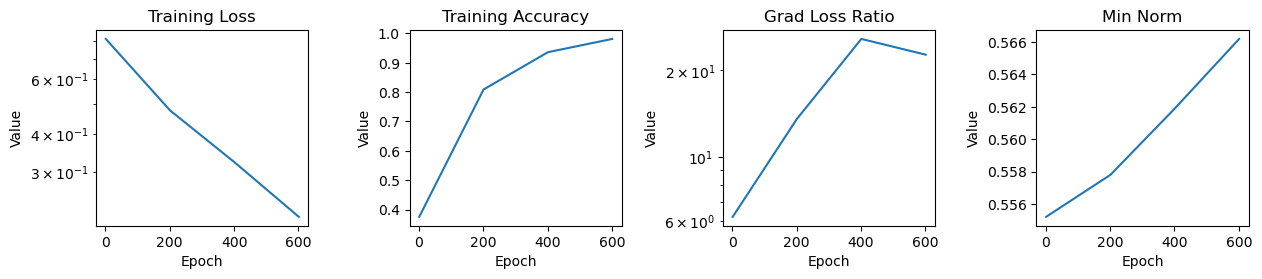

In [44]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 2048
model_name = "weight_norm_torch"
model_params = {"width": wn_width}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)

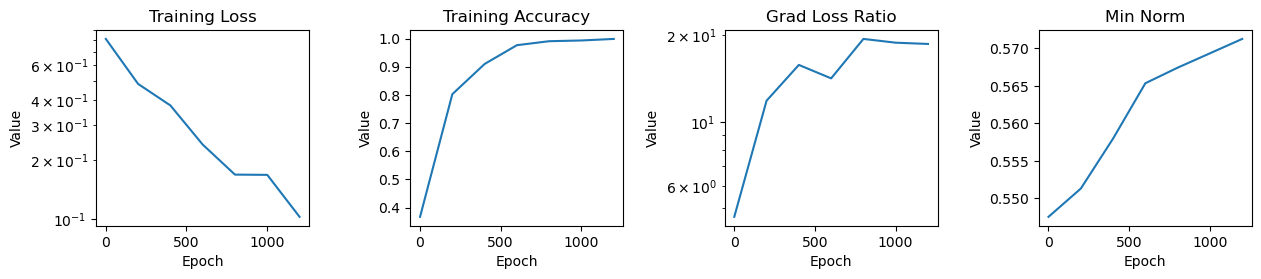

In [43]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 1024
model_name = "weight_norm_torch"
model_params = {"width": wn_width}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)

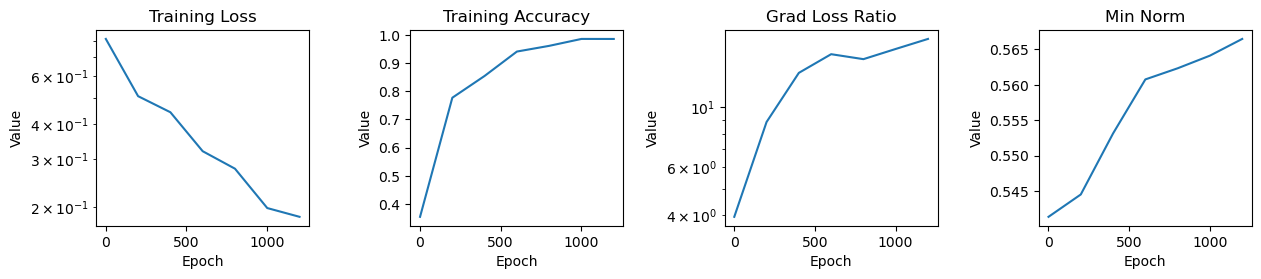

In [41]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 512
model_name = "weight_norm_torch"
model_params = {"width": wn_width}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)

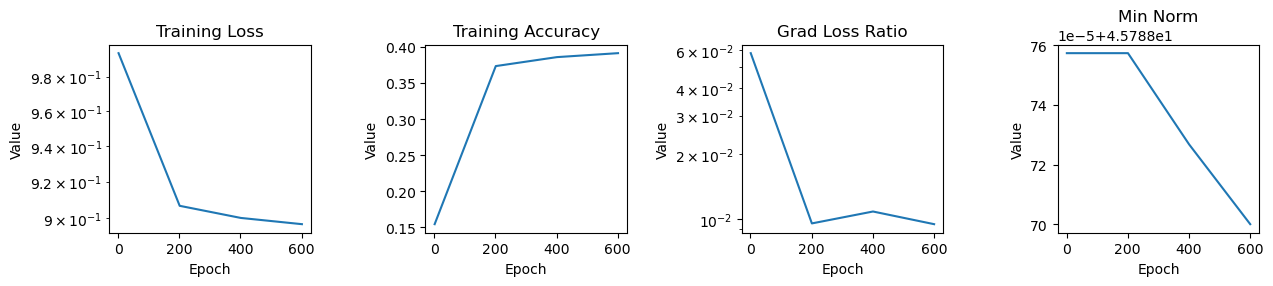

In [36]:
wn_width            = 512 #1024, 2048
wn_init_mode        = "O(1)"#"O(1/sqrt{m})"
wn_basis_var        = 5
wn_scale            = 10

lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
model_name = "weight_norm"
model_params = {"width": wn_width, "init": wn_init_mode, "var": wn_basis_var, "scale": wn_scale}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)


In [18]:
import os
def plot_figures_widths(widths, model_params):
    plt.figure(figsize=(15,5))
    lines = []
    for width in widths:
        model_param = model_params[width]
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **model_param)
        run_dir = os.listdir(f'../{directory}')
        prev_runs = [int(x.split("_")[-1]) for x in run_dir if x.startswith("run")]
        loss_list, acc_list, grad_loss_ratio_list, test_acc_list, wn_norm_list = [], [], [],[],[]
        
        for run in prev_runs:
            with open(f'../{directory}run_{run}/train_graphs.pk', 'rb') as f:
                train_graphs = pickle.load(f)
                loss_list.append(train_graphs.loss)
                acc_list.append(train_graphs.accuracy)
                grad_loss_ratio_list.append(train_graphs.wn_grad_loss_ratio)
                test_acc_list.append(train_graphs.test_accuracy)
                wn_norm_list.append(train_graphs.wn_norm_min)
                cur_epochs = train_graphs.log_epochs
        print(cur_epochs)

        plt.subplot(2,5,1)
        means = np.mean(np.array(loss_list), axis=0)
        stds = np.std(np.array(loss_list), axis=0)
        #plt.plot(x, means, label="Estimated Mean")
        plt.semilogy(cur_epochs, means)
        plt.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") # 1-sigma confidence interval
        
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')
        
        plt.subplot(2,5,2)
        means = np.mean(np.array(acc_list), axis=0)
        stds = np.std(np.array(acc_list), axis=0)
        #plt.plot(x, means, label="Estimated Mean")
        plt.plot(cur_epochs, means)
        plt.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") 
        #plt.plot(cur_epochs, train_graphs.accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Accuracy')

        plt.subplot(2,5,3)
        #print(train_graphs.wn_grad_loss_ratio)
        means = np.mean(np.array(grad_loss_ratio_list), axis=0)
        stds = np.std(np.array(grad_loss_ratio_list), axis=0)
        #plt.plot(x, means, label="Estimated Mean")
        plt.semilogy(cur_epochs, means)
        plt.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") 
        #plt.semilogy(cur_epochs, train_graphs.wn_grad_loss_ratio)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Grad Loss Ratio')

        plt.subplot(2,5,4)
        means = np.mean(np.array(test_acc_list), axis=0)
        stds = np.std(np.array(test_acc_list), axis=0)
        #plt.plot(x, means, label="Estimated Mean")
        plt.semilogy(cur_epochs, means)
        plt.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") 
        #plt.plot(cur_epochs, train_graphs.test_accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Accuracy')

        plt.subplot(2,5,5)
        means = np.mean(np.array(wn_norm_list), axis=0)
        stds = np.std(np.array(wn_norm_list), axis=0)
        #plt.plot(x, means, label="Estimated Mean")
        lines.append(plt.plot(cur_epochs, means)[0])
        plt.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") 
        #plt.plot(cur_epochs, train_graphs.wn_norm_min)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Min Norm')
        

    plt.legend(lines, widths)
    plt.tight_layout()
    plt.show()

results/cifar/sgd/weight_norm/width_2048/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
results/cifar/sgd/weight_norm/width_4096/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]


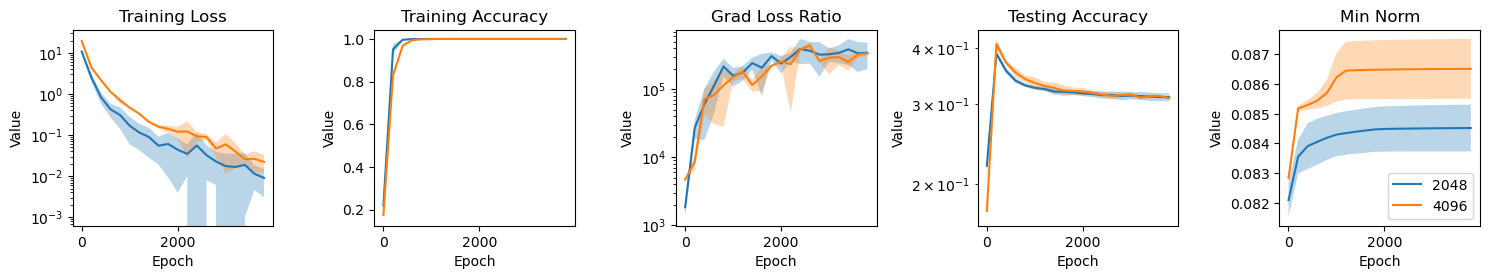

In [19]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.0001, "cifar", "sgd", 0, 512, 4000 
wn_width = 512
model_name = "weight_norm"
model_params = {}
model_params[512] = {"width": 512, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[1024] = {"width": 1024, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[2048] = {"width": 2048, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[4096] = {"width": 4096, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
"""
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
"""
plot_figures_widths([2048, 4096], model_params)